<a href="https://colab.research.google.com/github/MithunCm29/MachineLearning/blob/main/ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q transformers

     |████████████████████████████████| 2.5MB 4.4MB/s 
     |████████████████████████████████| 3.3MB 34.0MB/s 
     |████████████████████████████████| 901kB 41.8MB/s 


In [ ]:
pip install soundfile

In [4]:
!pip install jiwer

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149824 sha256=ad320eb67dab6958a92e06951399c52655938e9ffe61e4533b1a04d4d65a9e05
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [5]:
import soundfile as sf
import torch
from transformers import Wav2Vec2ForMaskedLM, Wav2Vec2Tokenizer
from jiwer import wer
# load pretrained model
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForMaskedLM.from_pretrained("facebook/wav2vec2-base-960h")

# load audio
audio_input, _ = sf.read("61-70968-0010.flac")

# transcribe
input_values = tokenizer(audio_input, return_tensors="pt").input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = tokenizer.batch_decode(predicted_ids)[0]
with open('transcription.txt', 'w') as writefile:
    writefile.write(transcription)
print(transcription)
ground_truth="FORTHWITH ALL RAN TO THE OPENING OF THE TENT TO SEE WHAT MIGHT BE AMISS BUT MASTER WILL WHO PEEPED OUT FIRST NEEDED NO MORE THAN ONE GLANCE"
print(ground_truth)
print("WER:", wer(ground_truth, transcription))

/usr/local/lib/python3.7/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:419: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1320: FutureWarning: The class `Wav2Vec2ForMaskedLM` is deprecated. Please use `Wav2Vec2ForCTC` instead.
  "The class `Wav2Vec2ForMaskedLM` is deprecated. Please use `Wav2Vec2ForCTC` instead.", FutureWarning
Some weights of Wav2Vec2ForMaskedLM were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


FORTHWITH ALL RAN TO THE OPENING OF THE TENT TO SEE WHAT MIGHT BE AMISS BUT MASTER WILL WHO PEEPED OUT FIRST NEEDED NO MORE THAN ONE GLANCE
FORTHWITH ALL RAN TO THE OPENING OF THE TENT TO SEE WHAT MIGHT BE AMISS BUT MASTER WILL WHO PEEPED OUT FIRST NEEDED NO MORE THAN ONE GLANCE
WER: 0.0


# Why did you choose a specific ASR system ?
The wav2vec 2.0 is a pre-trained model released by Facebook, the successor to wev2vec. The model is based on self-supervised learning. The classical ASR model is required to train with annotated speech audio with transcription [1]. The self-supervised model can train with the unannotated dataset. There was no requirement for transcription. This model used a multilayer conventional neural network to get a latent audio representation of 25ms. The transformer helps to get the correct quantization of the speech unit for the masked position. The model used transfer learning to make it self-supervised. This model trained with 10 minutes of transcribed speech and 53K hours of unlabeled speech [2]. So We prefer this model to test our small audio clip. LibriSpeech benchmark dataset tested with this model where WER is 8.6 with noisy data and 5.2 percent on clean speech[1].


# Pros and cons of ASR system that have been used.
**1.Cross-lingual training**
The idea is to pre-trained a single model on multiple languages. So that model performance is enhanced.  The model wav2vec 2.0 learned speech unit is used across various languages. So it's a kind of cross-lingual trained model.

**2.Performance on public speech benchmarks**
The model trained various publicly available dataset such as 
LibriSpeech benchmark, Libri-light, Noisy Student training,  LibriVox. Their performance is shown figure below [1].
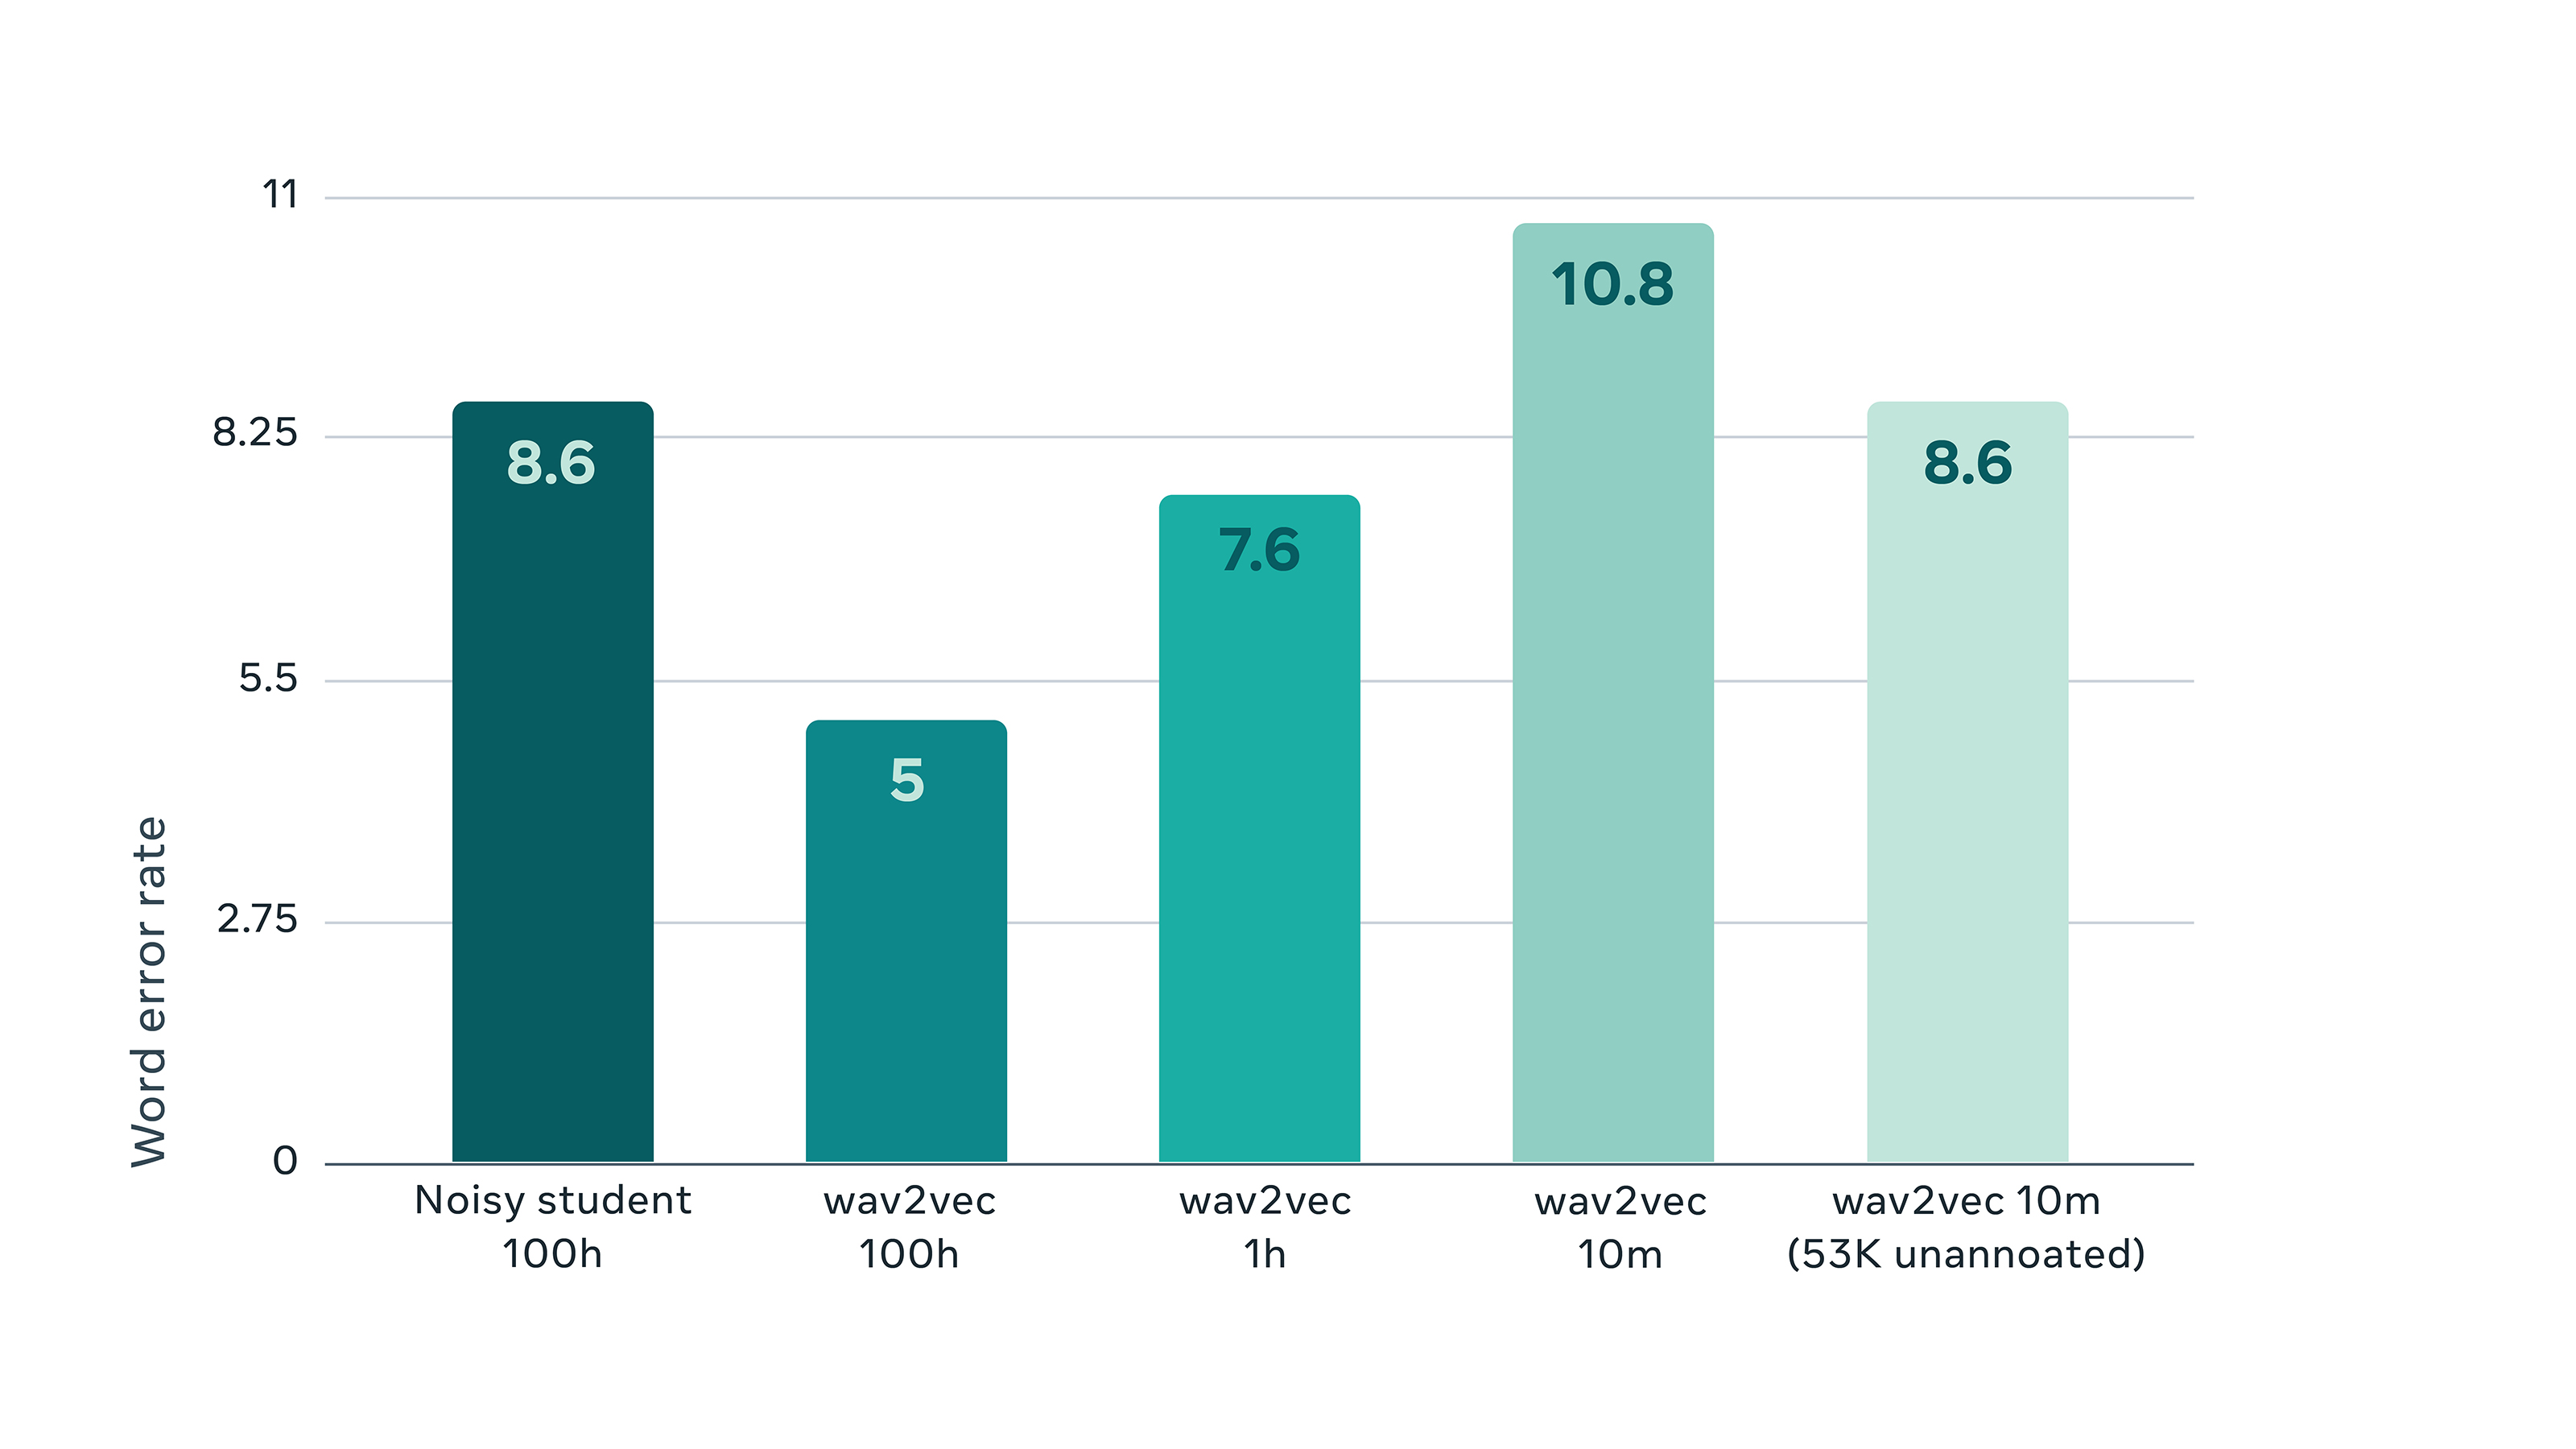

# Needs of building custom ASR models
From the above figure, we show the Word Error rate is greater than five percent. One percentage of error is huge for real-life applications. So we need to build the ACR system with a more low word error rate. We need to enhanced the performance of the model with more accuracy.  The above-mention model is required high resources. We need more ACR models with low resources. 

# Applications of ASR systems
There are lots of applications of ASR systems such as Okgoogle, Siri in our mobile application directed our commands. ASR system help to run the normal life of physically disabled persons. The voice inference over the keyboard and mouse also used the ASR system [3]. The dictation task can perform using a computer application. As the world is moving towards automation, the ASR system will help the world to become automated.

# Reference
[1]. https://ai.facebook.com/blog/wav2vec-20-learning-the-structure-of-speech-from-raw-audio/

[2]. Alexei Baevski, Henry Zhou, Abdelrahman Mohamed, and Michael Auli "wav2vec 2.0: A Framework for Self-Supervised
Learning of Speech Representations", Facebook AI(2020), Pages:19(https://arxiv.org/pdf/2006.11477.pdf?fbclid=IwAR3w9Odx4HtOE15TufFSuo6rYrb7aryuvSlXToikLXOLSAAyy15D-QA1WcA)

[3].Samudravijaya K "Automatic Speech Recognition" published under iitg Tutorials(http://www.iitg.ac.in/samudravijaya/tutorials/asrTutorial.pdf).
